基本统计信息：
       Explicit Bias  Implicit Bias  Emotional Intensity        Irony
count    5244.000000    5244.000000          5244.000000  5244.000000
mean        2.405606       2.554157             3.158085     0.222349
std         1.436180       1.308114             0.993201     0.415864
min         0.000000       0.000000             1.000000     0.000000
25%         1.000000       1.000000             3.000000     0.000000
50%         2.000000       2.000000             3.000000     0.000000
75%         4.000000       4.000000             4.000000     0.000000
max         5.000000       5.000000             5.000000     1.000000


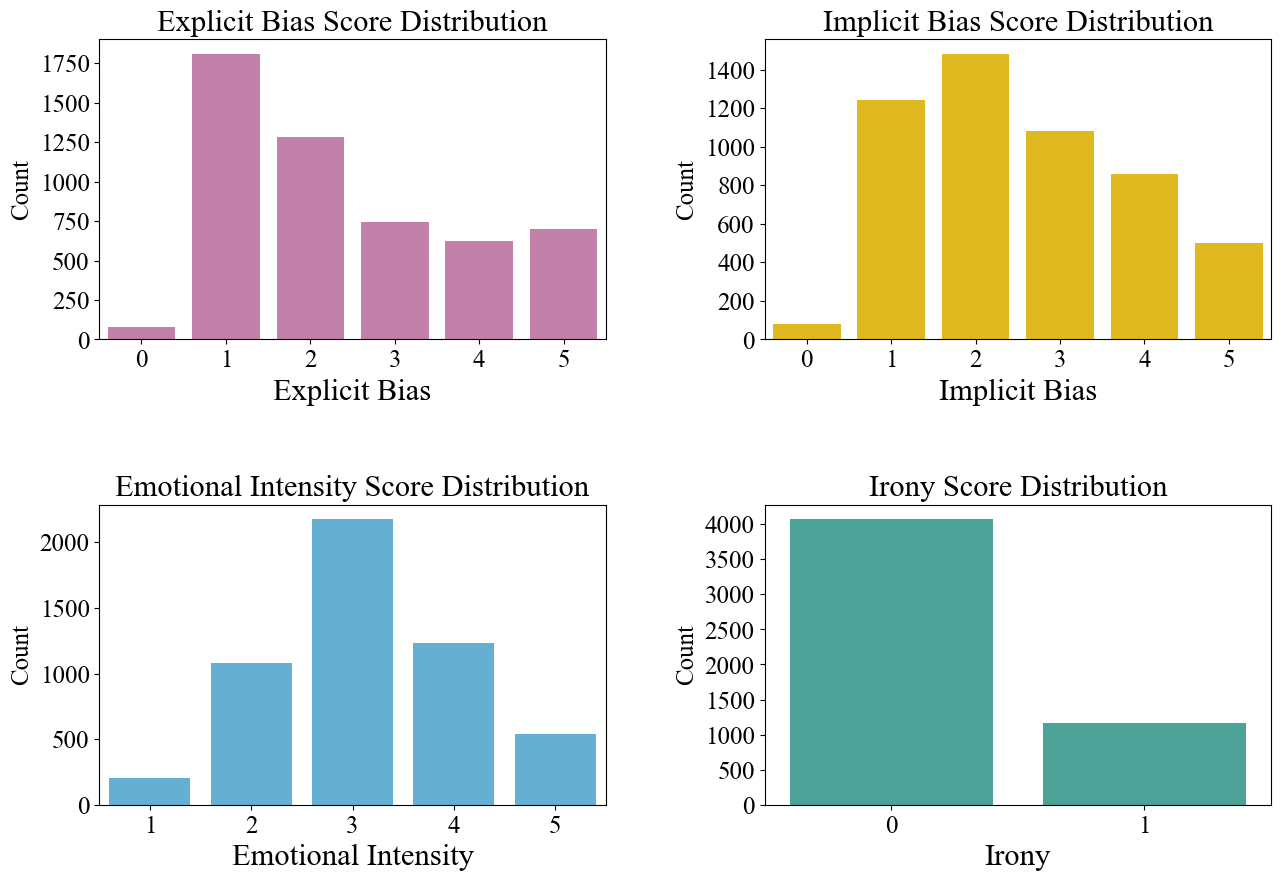


Explicit Bias评分的分布：
Explicit Bias
0      78
1    1812
2    1286
3     743
4     623
5     702
Name: count, dtype: int64

Implicit Bias评分的分布：
Implicit Bias
0      78
1    1241
2    1484
3    1080
4     860
5     501
Name: count, dtype: int64

Emotional Intensity评分的分布：
Emotional Intensity
1     204
2    1083
3    2179
4    1236
5     542
Name: count, dtype: int64

Irony评分的分布：
Irony
0    4078
1    1166
Name: count, dtype: int64


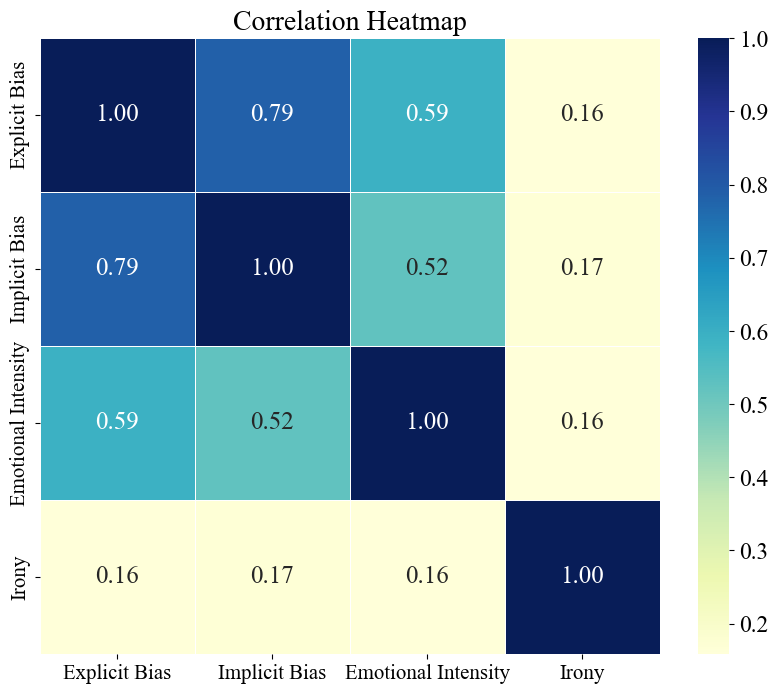

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 加载数据集
df = pd.read_csv("D:\desktop\同性恋科研\chlgbt_full.csv", header=1)

# 2. 计算基本统计信息
stats = df[['Explicit Bias', 'Implicit Bias', 'Emotional Intensity', 'Irony']].describe()
print("基本统计信息：")
print(stats)

# 设置字体和负号显示
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 3. 绘制评分分布图
plt.figure(figsize=(14, 10))

# 设置子图
plt.subplot(2, 2, 1)
sns.countplot(x='Explicit Bias', data=df, order=sorted(df['Explicit Bias'].unique()), palette=['#CD76AB'])
plt.title('Explicit Bias Score Distribution', fontsize=22)
plt.xlabel('Explicit Bias', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.subplot(2, 2, 2)
sns.countplot(x='Implicit Bias', data=df, order=sorted(df['Implicit Bias'].unique()), palette=['#FFCC00'])
plt.title('Implicit Bias Score Distribution', fontsize=22)
plt.xlabel('Implicit Bias', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.subplot(2, 2, 3)
sns.countplot(x='Emotional Intensity', data=df, order=sorted(df['Emotional Intensity'].unique()), palette=['#52B6E6'])
plt.title('Emotional Intensity Score Distribution', fontsize=22)
plt.xlabel('Emotional Intensity', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.subplot(2, 2, 4)
sns.countplot(x='Irony', data=df, order=sorted(df['Irony'].unique()), palette=['#3EB0A2'])
plt.title('Irony Score Distribution', fontsize=22)
plt.xlabel('Irony', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=18)

# 调整子图之间的距离
plt.tight_layout(pad=5.0)

# 展示图形
plt.show()

# 4. 查看评分的分布情况
for column in ['Explicit Bias', 'Implicit Bias', 'Emotional Intensity', 'Irony']:
    print(f"\n{column}评分的分布：")
    print(df[column].value_counts().sort_index())

# 5. 绘制相关性热力图
# 计算相关性矩阵
correlation_matrix = df[['Explicit Bias', 'Implicit Bias', 'Emotional Intensity', 'Irony']].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=15)  # 设置横轴坐标数字字体大小
plt.yticks(fontsize=15)  # 设置纵轴坐标数字字体大小
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=17) 
plt.show()

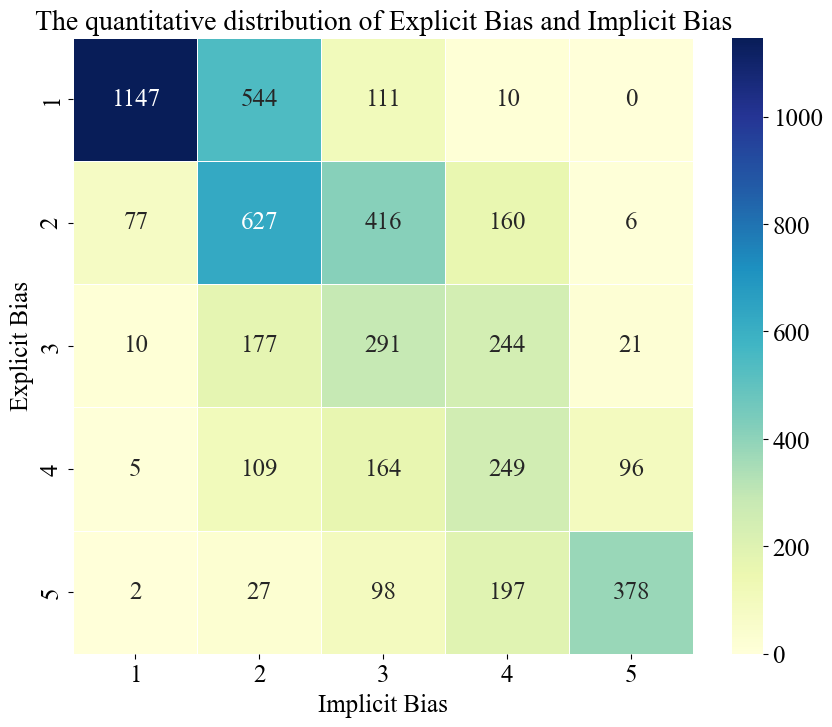

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
df = df[(df['Explicit Bias'] > 0) | (df['Implicit Bias'] > 0)]

# 统计每个显性歧视和隐性歧视组合的数量
pivot_table = df.pivot_table(index='Explicit Bias', columns='Implicit Bias', aggfunc='size', fill_value=0)

# 绘制热力图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})  # 设置注释字体大小
plt.title('The quantitative distribution of Explicit Bias and Implicit Bias', fontsize=20)
plt.xlabel('Implicit Bias', fontsize=18)
plt.ylabel('Explicit Bias', fontsize=18)
plt.xticks(fontsize=18)  # 设置横轴坐标数字字体大小
plt.yticks(fontsize=18)  # 设置纵轴坐标数字字体大小

# 设置颜色条字体大小
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # 设置颜色条字体大小
plt.show()